<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module1_WageRegressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as st

To make the data available, you can clone my github repository into your colab notebook, via (remove the hashtag of course):

In [2]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


If you now list the content...

In [3]:
!ls

ML_656	sample_data


you should see `ML_656` listed. And we can pull the data from there:

In [4]:
wage_data = pd.read_csv('ML_656/Wages_1985_Current_Population_Survey.csv')
wage_data.head() #syntax makes clear that data is an object!

,Yrs_Ed,Sthrn_Rgn,Sex,Yrs_Exprnc,Union,Wage,Age,Race,Occup,Sect,Marr
0,8,0,1,21,0,5.10,35,H,Other,Manf,1
1,9,0,1,42,0,4.95,57,W,Other,Manf,1
2,12,0,0,1,0,6.67,19,W,Other,Manf,0
3,12,0,0,4,0,4.00,22,W,Other,Other,0
4,12,0,0,17,0,7.50,35,W,Other,Other,1


So we have the data available. Let's look at aggregate stats.

In [5]:
wage_data.describe()

,Yrs_Ed,Sthrn_Rgn,Sex,Yrs_Exprnc,Union,Wage,Age,Marr
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,13.018727,0.292135,0.458801,17.822097,0.179775,9.024064,36.833333,0.655431
std,2.615373,0.455170,0.498767,12.379710,0.384360,5.139097,11.726573,0.475673
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000
25%,12.000000,0.000000,0.000000,8.000000,0.000000,5.250000,28.000000,0.000000
50%,12.000000,0.000000,0.000000,15.000000,0.000000,7.780000,35.000000,1.000000
75%,15.000000,1.000000,1.000000,26.000000,0.000000,11.250000,44.000000,1.000000
max,18.000000,1.000000,1.000000,55.000000,1.000000,44.500000,64.000000,1.000000


OK, so let's run the wage regression using sklearn. For that we first have to recode our categorical variables.

In [6]:
wage_data['Race'].value_counts()

W    440
O     67
H     27
Name: Race, dtype: int64

In [7]:
wage_data['Race_H'] = np.where(wage_data['Race'] == "H", 1, 0)
wage_data['Race_O'] = np.where(wage_data['Race'] == "O", 1, 0)

A more streamlines way of doing this is via `get_dummies` in pandas:

In [8]:
pd.get_dummies(wage_data['Race']).head()

,H,O,W
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


We could then add in via `wage_data['Race_H'] = pd.get_dummies(wage_data['Race'])['H']` etc. 
So let's define our features:



In [9]:
X1 = wage_data[['Sex','Age','Race_H','Race_O']]
y = wage_data['Wage']

In [10]:
model1 = LinearRegression(fit_intercept=True)
model1.fit(X1, y)
print(model1.intercept_)
print(model1.coef_)

7.223362465207445
[-2.29365014  0.08453479 -1.75369486 -1.3708409 ]


So the presentation of the regression results is not as neat as when using R or statsmodels. But as we will see `sklearn` will make it easy to build more advanced models. That's its purpose. 

In [11]:
X2 = wage_data[['Sex','Age','Race_H','Race_O','Yrs_Ed','Sthrn_Rgn']]

In [12]:
model2 = LinearRegression(fit_intercept=True)
model2.fit(X2, y)
print(model2.intercept_)
print(model2.coef_)

-4.010835177326475
[-2.36433005  0.11123542 -0.22566084 -0.85533841  0.7975608  -0.82842797]


Let's run the full regression:

In [13]:
Occup_d = pd.get_dummies(wage_data['Occup'], prefix='Occup', drop_first=True)
Race_d = pd.get_dummies(wage_data['Race'], prefix='Race', drop_first=True)
Sect_d = pd.get_dummies(wage_data['Sect'], prefix='Sect', drop_first=True)

In [14]:
X = wage_data.drop(columns=['Wage','Occup','Race','Sect'])
X = pd.concat([X,Occup_d,Race_d,Sect_d], axis=1)

In [15]:
model3 = LinearRegression(fit_intercept=True)
model3.fit(X, y)
print(model3.intercept_)
print(model3.coef_)

-0.08503610771832903
[ 0.81279135 -0.56274247 -1.94252212  0.24484501  1.60168787 -0.15802823
  0.30050151 -0.19633088 -0.21384666  3.26819795 -0.02232313  1.93462877
 -0.79564391 -0.70717721 -0.21384666  0.41017754  0.56348715 -0.47740163]


And let's check the residuals.

(array([ 14., 147., 268.,  73.,  25.,   6.,   0.,   0.,   0.,   1.]),
 array([-11.40903022,  -6.76600187,  -2.12297353,   2.52005481,
          7.16308315,  11.80611149,  16.44913983,  21.09216817,
         25.73519652,  30.37822486,  35.0212532 ]),
 <a list of 10 Patch objects>)

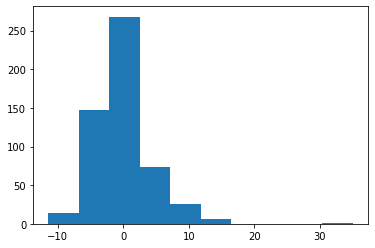

In [16]:
ypred = model3.predict(X)
eps = y - ypred
plt.hist(eps)